<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_17_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4

ДЗ 17. Time series

Датасет для роботи:

https://fred.stlouisfed.org/series/T10Y2Y

На вибір - Darts, Prophet

In [ ]:
!pip install darts

In [ ]:
!pip install prophet

In [ ]:
!pip install statsmodels

In [ ]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

sns.set()

%config InlineBackend.figure_format = "png"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving T10Y2Y.csv to T10Y2Y (2).csv


In [ ]:
df = pd.read_csv("T10Y2Y.csv")
df.head()

,observation_date,T10Y2Y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


In [ ]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y1urgzn/f5chq65d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y1urgzn/v6jtvc9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27176', 'data', 'file=/tmp/tmp1y1urgzn/f5chq65d.json', 'init=/tmp/tmp1y1urgzn/v6jtvc9f.json', 'output', 'file=/tmp/tmp1y1urgzn/prophet_modelqrm9y9ew/prophet_model-20250404222644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:26:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:27:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


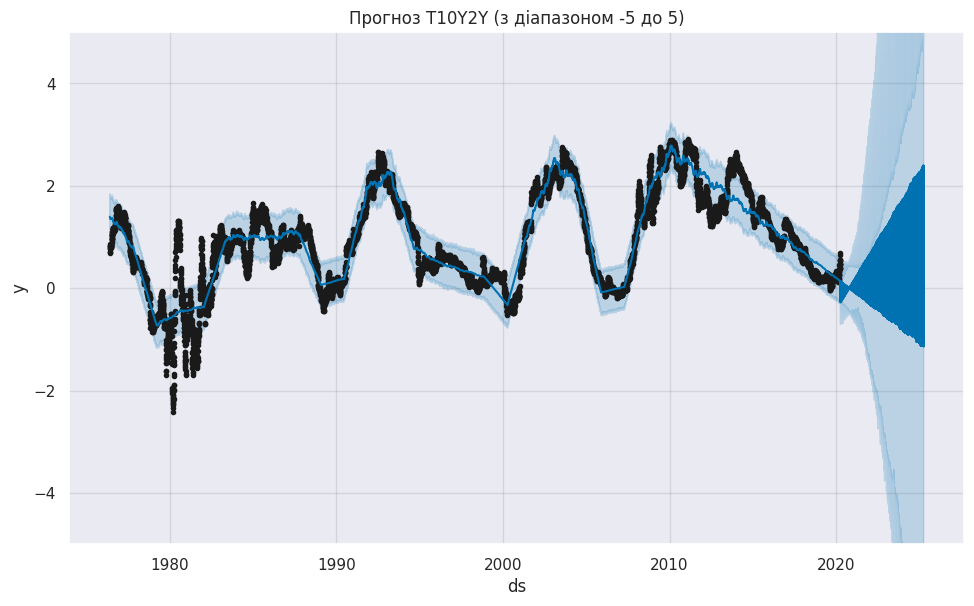

In [ ]:
# Перейменування колонок під вимоги Prophet
df = df.rename(columns={"observation_date": "ds", "T10Y2Y": "y"})

# Перетворення дати в datetime
df["ds"] = pd.to_datetime(df["ds"])

# Приведення значень до числового типу (можливо є "NaN", ".", тощо)
df["y"] = pd.to_numeric(df["y"], errors="coerce")

# Видаляємо пропуски
df = df.dropna()

# Побудова моделі
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

# Прогнозування на 5 років (1825 дні)
future = m.make_future_dataframe(periods=1825)
forecast = m.predict(future)

# Побудова графіку
fig = m.plot(forecast)
plt.ylim(-5, 5)  # обмеження осі Y
plt.title("Прогноз T10Y2Y (з діапазоном -5 до 5)")
plt.show()

такий великий проміжок часц приймає за якийсь флет і не робить прогноз

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y1urgzn/aa9cqxfs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y1urgzn/y3cxqzeg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53389', 'data', 'file=/tmp/tmp1y1urgzn/aa9cqxfs.json', 'init=/tmp/tmp1y1urgzn/y3cxqzeg.json', 'output', 'file=/tmp/tmp1y1urgzn/prophet_modelktvkl1q1/prophet_model-20250404222731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


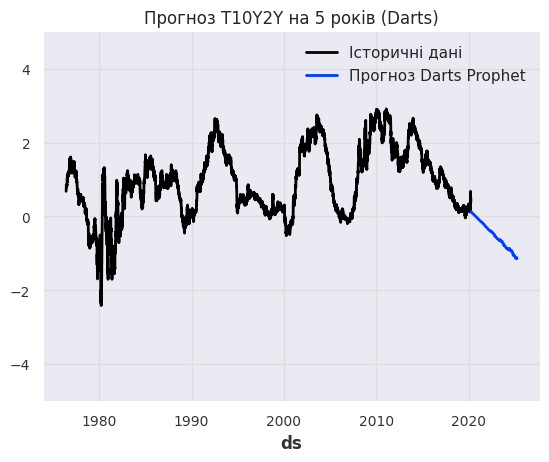

In [ ]:
from darts import TimeSeries
from darts.models import Prophet as DartsProphet
import matplotlib.pyplot as plt

# Приводимо дані до щоденної частоти й заповнюємо пропуски
df = df.set_index('ds')
df = df.asfreq('D')  # встановлюємо щоденну частоту
df['y'] = df['y'].interpolate()  # заповнення пропущених значень

df = df.reset_index()

# Створення TimeSeries без заповнення додаткових дат (вже зробили це)
series = TimeSeries.from_dataframe(df, 'ds', 'y', fill_missing_dates=False)

# Побудова моделі
model = DartsProphet(seasonality_mode='multiplicative')
model.fit(series)

# Прогноз на 1825 днів (5 років)
forecast = model.predict(1825)

# Побудова графіку
series.plot(label="Історичні дані")
forecast.plot(label="Прогноз Darts Prophet")
plt.ylim(-5, 5)
plt.title("Прогноз T10Y2Y на 5 років (Darts)")
plt.legend()
plt.show()




Darts зробив предікт на пониження тренду, прав він не дуже, так, вгадав, що за 5 років знизилося, але на соті 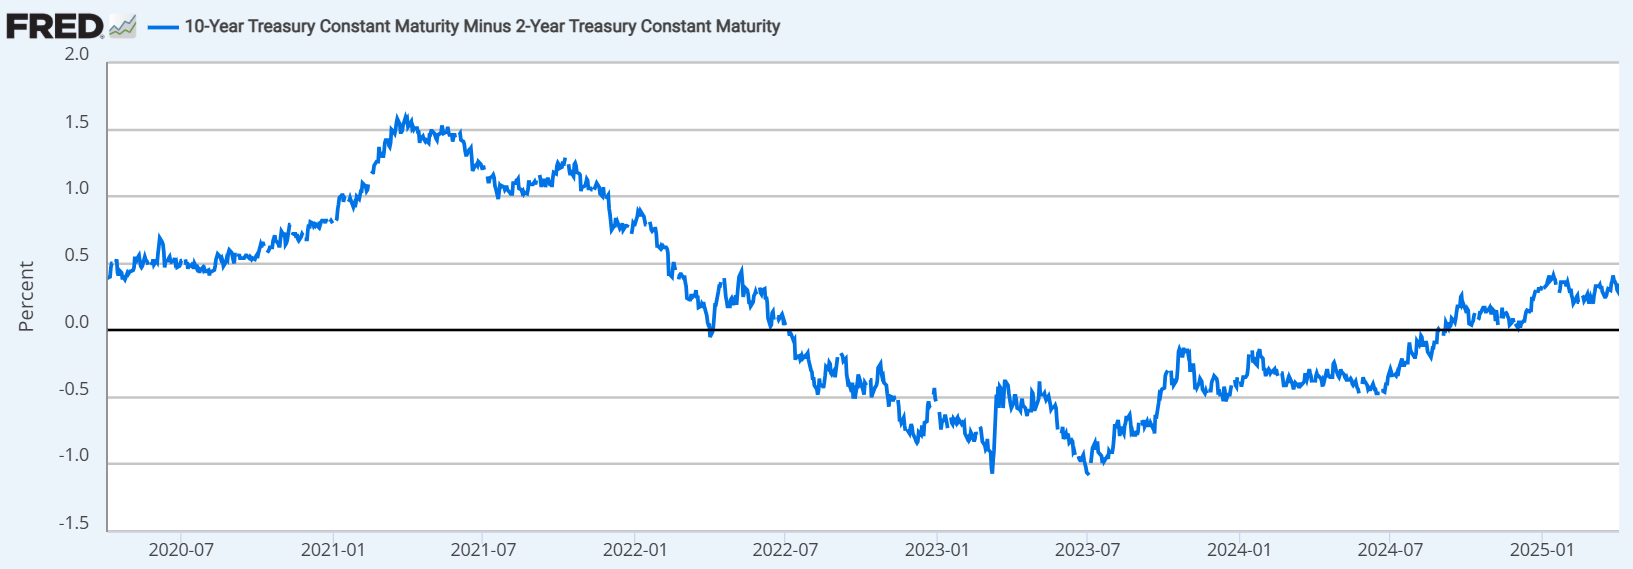

In [ ]:
from darts.models import ARIMA

In [ ]:
# Створюємо ARIMA модель з базовими параметрами (можна тюнити)
arima_model = ARIMA(p=2, d=1, q=2)
arima_model.fit(series)

# Прогноз на 1825 днів (5 років)
forecast_arima = arima_model.predict(1825)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


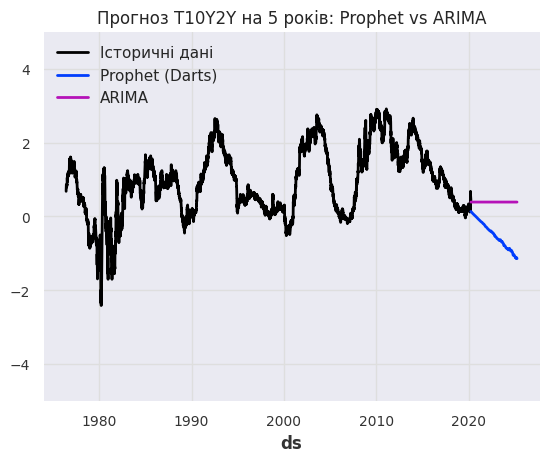

In [ ]:
series.plot(label="Історичні дані")
forecast.plot(label="Prophet (Darts)")
forecast_arima.plot(label="ARIMA")
plt.ylim(-5, 5)
plt.title("Прогноз T10Y2Y на 5 років: Prophet vs ARIMA")
plt.legend()
plt.show()

Аріма кращий дав предікт 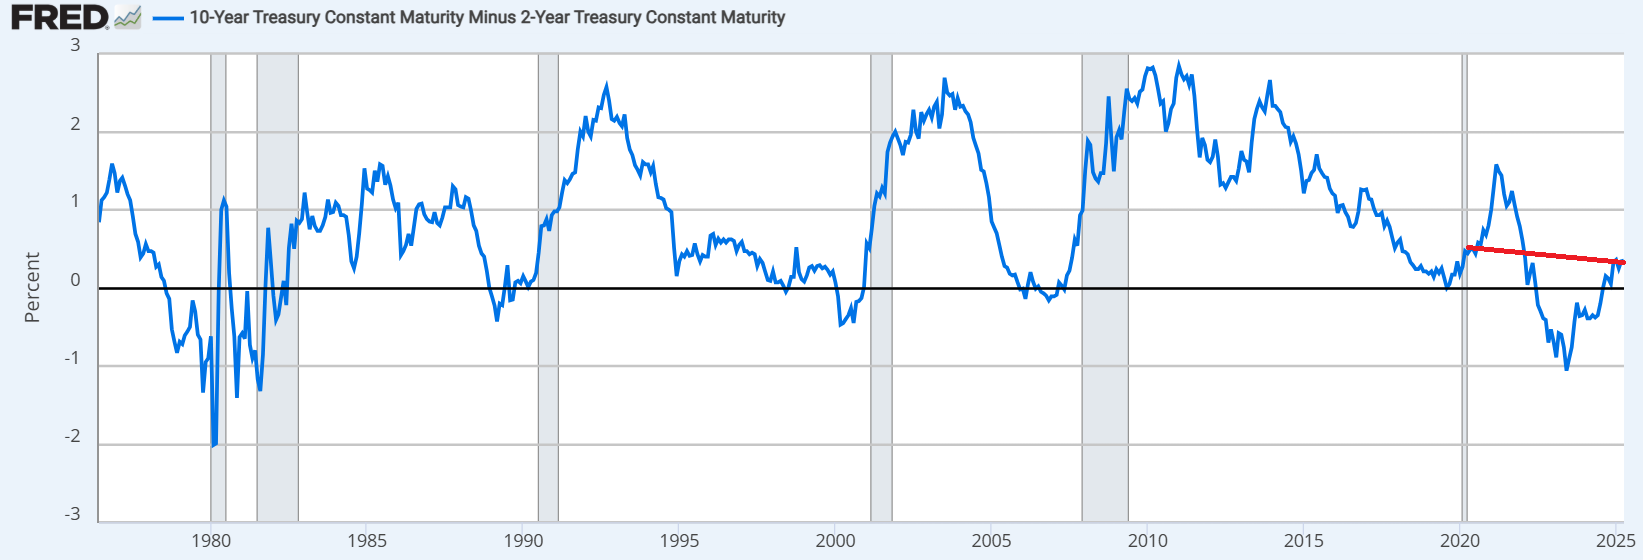